# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [1]:
import pandas as pd
dataset = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [2]:
dataset.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,1,1,598,9,1
1,2,41,0,28,28,7,13,2,1,584,20,0
2,3,47,1,27,10,2,29,3,12,757,21,0
3,4,35,1,9,12,5,17,3,3,232,18,0
4,5,53,0,58,24,9,2,2,12,533,18,0
5,6,30,1,41,14,10,10,3,1,500,29,0
6,7,47,0,37,15,9,28,1,3,574,14,1
7,8,54,0,36,11,0,18,2,1,323,16,0
8,9,36,1,20,5,10,8,1,1,687,8,0
9,10,65,1,8,4,2,23,1,12,995,10,0


### Getting the inputs and output

In [3]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [4]:
print(X)

[[ 22   0  25 ...   1 598   9]
 [ 41   0  28 ...   1 584  20]
 [ 47   1  27 ...  12 757  21]
 ...
 [ 25   1  39 ...   1 327  20]
 [ 50   0  18 ...   1 540  13]
 [ 52   0  45 ...   1 696  22]]


In [5]:
print(y)

[1 0 0 ... 1 1 1]


### Creating the Training Set and the Test Set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
print(X_train)

[[ 48   0  17 ...   3 685  14]
 [ 22   0  23 ...   1 997   7]
 [ 59   1  42 ...   1 837  26]
 ...
 [ 45   0  14 ...   3 103  26]
 [ 30   1  33 ...   1 637   3]
 [ 23   1   1 ...  12 481  27]]


In [8]:
print(X_test)

[[ 62   0  45 ...  12 633  26]
 [ 35   1  25 ...   3 620  17]
 [ 47   0  41 ...   1 939  27]
 ...
 [ 33   0  37 ...   1 952   5]
 [ 65   1  31 ...   1 944   8]
 [ 30   0  42 ...   3 847   6]]


In [9]:
print(y_train)

[0 1 1 ... 1 0 0]


In [10]:
print(y_test)

[0 1 1 ... 0 0 0]


### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

## Part 2 - Building and training the model

### Building the model

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the model

In [13]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [14]:
y_pred = model.predict(sc.transform(X_test))

In [15]:
print(y_pred)

[0 1 1 ... 0 0 0]


Making the prediction of a single data point with:

1. Age = 22
2. Gender = 0
3. Tenure = 25
4. Usage Frequency = 14
5. Support Calls = 4
6. Payment Delay = 27
7. Subscription Type = 1
8. Contract Length = 1
9. Total Spend = 598
10. Last interaction = 9

In [16]:
print((model.predict(sc.transform([[22,0,25,14,4,27,1,1,598,9]]))))

[1]


## Part 3: Evaluating the model 

### Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[5572 1205]
 [1054 5044]]


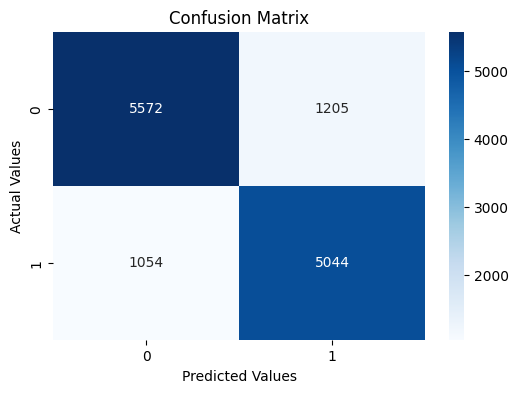

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Accuracy

In [19]:
(5044+5572)/(5044+5572+1054+1205)

0.8245436893203884

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8245436893203884